In [2]:
from Portfolio import Portfolio, universe # universe is a global variable
# and each portfolio can access to the universe
import imp
from Admin import Admin, MeanReturn, MoneyWeightedReturn,SimpleReturn,TimeWeightedReturn,Volatility, PortfolioVaR, SharpeRatio, calculate_drawdown
import pandas as pd

We are in a good state, target weights with short selling returned


([(0.147, 0.17)], [{'ACWI': 1.0}])

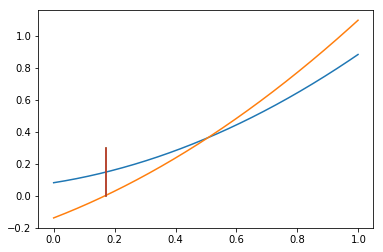

In [4]:
benchmark=Admin()
benchmark.suggestPortfolio('4','2014-04-01')

In [3]:
benchmark.acceptPortfolio(0)

{'ACWI': 2760.4891412830875, 'rf_rate_cad': 40358.85420402051}

In [4]:
benchmark.trackPortfolio()
benchmark.getAccountValue('2014-04-01')

199980.00199980004

In [5]:
import numpy as np 
np.float(benchmark.getAccountValue('2019-06-01'))

540743.9144080993

In [6]:
benchmark.portfolio['2019-06-01'].portfolio

{'ACWI': Deposit-CAD    4553.08139
 dtype: float64, 'rf_rate_cad': Deposit-CAD    109129.935919
 dtype: float64}

In [7]:
benchmark.getAccountValue('2019-06-01')

540743.9144080993

In [8]:
from datetime import datetime
date_format='%Y-%m-%d'
start_date='2014-04-01'
today_date=benchmark.today
all_dates=[datetime.strftime(item,date_format) for item in pd.date_range(start_date,today_date,freq='M')]
portf_values=[]
# portf_values_norebal=[]
for item in all_dates:
    portf_values.append(benchmark.getAccountValue(item))
#     portf_values_norebal.append(test_admin_norebal.getAccountValue(item))


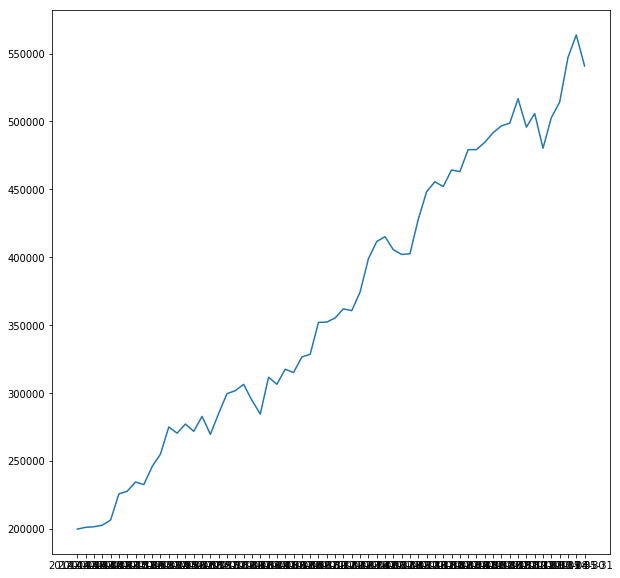

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(all_dates,portf_values)
# plt.plot(all_dates,portf_values_norebal,'--')

In [11]:
benchmark.portfolio['2019-06-01']

In [12]:
my_cash=universe.get_security('rf_rate_cad')

In [13]:
my_cash.get_slice_prices('2019-06-01','2019-06-01')

date
2019-05-31    1.264502
Name: rf_rate_cad, dtype: float64

In [14]:
my_cash.get_cc_return('2019-06-01','2019-06-01')

1.0

In [15]:
from HelperFunctions import fill_missing_data_business

In [16]:
fill_missing_data_business(my_cash.price,'2014-04-01','2014-09-01','B').iloc[-1]/fill_missing_data_business(my_cash.price,'2014-04-01','2014-09-01','B').iloc[0]

1.0

In [17]:
import pandas as pd
from datetime import datetime
# [datetime.strftime(item,'%Y-%m-%d') for item in pd.date_range('2003-09-16','2019-06-01',freq='B')]
my_cash.price.reindex([datetime.strftime(item,'%Y-%m-%d') for item in pd.date_range('2003-09-16','2019-06-01',freq='B')],method='ffill')

date
2003-09-16    1.000055
2003-09-17    1.000109
2003-09-18    1.000163
2003-09-19    1.000217
2003-09-22    1.000271
2003-09-23    1.000325
2003-09-24    1.000379
2003-09-25    1.000433
2003-09-26    1.000488
2003-09-29    1.000542
2003-09-30    1.000595
2003-10-01    1.000636
2003-10-02    1.000676
2003-10-03    1.000716
2003-10-06    1.000756
2003-10-07    1.000796
2003-10-08    1.000836
2003-10-09    1.000876
2003-10-10    1.000916
2003-10-13    1.000956
2003-10-14    1.000995
2003-10-15    1.001035
2003-10-16    1.001074
2003-10-17    1.001114
2003-10-20    1.001153
2003-10-21    1.001193
2003-10-22    1.001232
2003-10-23    1.001271
2003-10-24    1.001310
2003-10-27    1.001350
                ...   
2019-04-22    1.259598
2019-04-23    1.259767
2019-04-24    1.259937
2019-04-25    1.260107
2019-04-26    1.260277
2019-04-29    1.260446
2019-04-30    1.260615
2019-05-01    1.260784
2019-05-02    1.260952
2019-05-03    1.261121
2019-05-06    1.261290
2019-05-07    1.261459
2019-0

## Account Balance

In [17]:
test_admin.getAccountValue('2019-06-01')

505878.3024997853

In [21]:
# account info
tickers = ['MRD.TO',
   'CIM.AX',
   'GAPSX',
   'LNC',
   'KNEBV.HE']
portofolioInfo = pd.DataFrame()
i = []
a = []
c = []
sec = []
for t in tickers:
    instru = universe.get_security(t)
    i.append(type(instru))
    a.append(instru.get_type_RM())
    c.append(instru.country)
    sec.append(instru.sector)
op = [tickers, i, a, c, sec]    
cols = ["Security Ticker", "Instrument Type", "Asset Class", "Country", "Sector"]
for num in range(5):
    portofolioInfo[cols[num]] = op[num]

portofolioInfo

,Security Ticker,Instrument Type,Asset Class,Country,Sector
0,MRD.TO,<class 'Instrument.Stock'>,Equity:CAD,Canada,Real Estate
1,CIM.AX,<class 'Instrument.Stock'>,Equity:AUD,Australia,Industrials
2,GAPSX,<class 'Instrument.Stock'>,Equity:USD,NaN,NaN
3,LNC,<class 'Instrument.Stock'>,Equity:USD,United States,Financial Services
4,KNEBV.HE,<class 'Instrument.Stock'>,Equity:EUR,Finland,Industrials


## Risk Metrics

In [16]:
start_dates=['2019-03-01', '2018-06-01', "2014-04-01"] 
risk_metrics_table = pd.DataFrame()
for start_date in start_dates:
    risks = []
    risks.append(MeanReturn(test_admin.portfolio,start_date,today_date))
    risks.append(SimpleReturn(test_admin.portfolio,start_date,today_date))
    risks.append(TimeWeightedReturn(test_admin.portfolio,test_admin.cash_transacs,start_date,today_date))
    #print(TimeWeightedReturn(benchmark.portfolio,benchmark.cash_transacs,start_date,today_date))
    risks.append(MoneyWeightedReturn(test_admin.portfolio,test_admin.cash_transacs,start_date,today_date))
    risks.append(Volatility(test_admin.portfolio,start_date,today_date))
    risks.append(SharpeRatio(test_admin.portfolio,start_date,today_date, universe.get_security("rf_rate_cad")))
    risks.append(calculate_drawdown(test_admin, start_date, today_date))
    risk_metrics_table[start_date] = pd.Series(risks, index=["Mean Return", "Simple Return", "Time W. Return",
                                                             "Money W. Return","Vol", "Sharpe Ratio", "Max Drawdown"])
risk_metrics_table

risk free -0.023184889545618977
0.0628681825349535
0.13926074907090907
risk free -0.02091873878816837
0.12474970735315792
0.07126935637222602
risk free -0.007119939414804108
0.14057959108794593
0.1895194141189493


,2019-03-01,2018-06-01,2014-04-01
Mean Return,-0.075772,0.068313,0.169204
Simple Return,0.162446,0.092188,0.196639
Time W. Return,-0.009093,0.007736,0.070612
Money W. Return,0.372841,0.186335,0.360159
Vol,0.062868,0.124750,0.140580
Sharpe Ratio,2.215123,0.571299,1.348129
Max Drawdown,-0.023879,-0.059162,-0.123238


In [29]:
#TimeWeightedReturn(benchmark.portfolio,benchmark.cash_transacs,'2018-06-01',today_date)
#benchmark.portfolio

{'2014-04-01': <Portfolio.Portfolio at 0x1c1e16f080>,
 '2014-09-01': <Portfolio.Portfolio at 0x1114ab780>,
 '2014-12-01': <Portfolio.Portfolio at 0x1c1e29a4e0>,
 '2015-03-01': <Portfolio.Portfolio at 0x1c1e29a0b8>,
 '2015-06-01': <Portfolio.Portfolio at 0x1c1e2ff978>,
 '2015-09-01': <Portfolio.Portfolio at 0x1c1e2ffda0>,
 '2015-12-01': <Portfolio.Portfolio at 0x1c1e29a668>,
 '2016-03-01': <Portfolio.Portfolio at 0x1c1e29a1d0>,
 '2016-06-01': <Portfolio.Portfolio at 0x1c1e2ff898>,
 '2016-09-01': <Portfolio.Portfolio at 0x1c1e2ffcc0>,
 '2016-12-01': <Portfolio.Portfolio at 0x1c1eef0048>,
 '2017-03-01': <Portfolio.Portfolio at 0x1c1eef0668>,
 '2017-06-01': <Portfolio.Portfolio at 0x1c1e2d6c50>,
 '2017-09-01': <Portfolio.Portfolio at 0x1c1e2d6828>,
 '2017-12-01': <Portfolio.Portfolio at 0x1c1e2edbe0>,
 '2018-03-01': <Portfolio.Portfolio at 0x1c1e2d6f98>,
 '2018-06-01': <Portfolio.Portfolio at 0x1c1e2edb38>,
 '2018-09-01': <Portfolio.Portfolio at 0x1c1e2d6e48>,
 '2018-12-01': <Portfolio.Por

In [30]:
#benchmark.cash_transacs

,Deposit-CAD
2000-01-01,0
2000-01-02,0
2000-01-03,0
2000-01-04,0
2000-01-05,0
2000-01-06,0
2000-01-07,0
2000-01-08,0
2000-01-09,0
2000-01-10,0
